# Training a perceptron

Deep Learning and Computer Vision

In [210]:
import numpy as np
import matplotlib.pyplot as plt

Generate data and plot it.

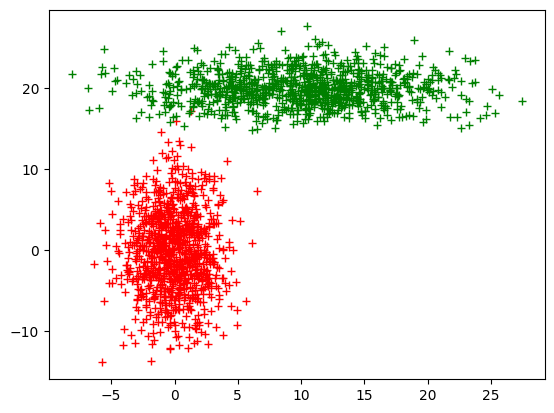

In [211]:
N=1000

a=np.random.normal((0,0), (2,5), (N,2))
b=np.random.normal((10,20), (6,2), (N,2))

# Plot
plt.plot(a[:,0],a[:,1],'r+')
plt.plot(b[:,0],b[:,1],'g+')

plt.show()

# 1/ Create a data numpy array containing the (shuffled) 2000 points with their labels (1 or 0).

In [238]:
def pre_process(a, b):
    """
        Pre-process the data by merging raw data with target vector, then shuffling it.

        `a` and `b`: data arrays (2D)

        Return data of points (2D) + target (1D) `X` 
    """
    n = len(a)

    # Classes
    y_a = np.zeros(n)  # Red = 0
    y_b = np.ones(n)  # Green = 1

    # Concatenate array
    X_raw = np.concatenate((a, b))
    y_raw = np.concatenate((y_a, y_b))

    # Merge everything into a single array 
    X = np.insert(X_raw, 2, y_raw, axis=1)

    # Shuffle
    np.random.shuffle(X)
    return X

In [240]:
X = pre_process(a, b)

X

array([[-0.5293713 , 18.76793705,  1.        ],
       [19.16674026, 18.57768764,  1.        ],
       [17.06751044, 16.08045013,  1.        ],
       ...,
       [ 2.45632258, -0.22000188,  0.        ],
       [ 9.86300203, 22.42869609,  1.        ],
       [19.18129615, 21.7082963 ,  1.        ]])

# 2/ Create one function that makes the prediction from one point (2D) and one weight vector (3D). The activation function is a step function with threshold at 0. For testing, you can just put random values in the weight vector.


In [214]:
# Weights
W = np.random.rand(3)

# For plotting later
initial_W = W.copy()

W

array([0.17349412, 0.60987242, 0.97164483])

In [215]:
def step_predict(x, W):
    """
        Predict based on a step function (y=1 for x>0, other y=0).

        `x`: point to be predicted (2D)
        `W`: weight vector (3D)

        Return prediction `y`
    """
    # x = 2D array
    y = W[0] + x[0]*W[1] + x[1]*W[2]  # Prediction function
    # Step function restriction
    if y > 0:
        y = 1
    else:
        y = 0
    return y

In [216]:
step_predict(np.array([29, 20]), W)

1

# 3/ Create a second function that updates the weights from the current weight vector and one point (2D vector + label). The learning rate is also one input of the function. Use the update rule for a perceptron, studied in class.

In [217]:
def update_weights(x, W, rate):
    """
        Update the neural network weights.

        `X`: dataset of points (2D) and target (1D)
        `W`: weight vector (3D)
        `rate`: learning rate

        Return the updated weight vector `W`
    """
    T = x[2]
    y = step_predict(np.array([x[0], x[1]]), W)
    
    W[0] = W[0] + rate*(T-y)
    for i in range(1, len(W)):
        W[i] = W[i] + rate*(T - y)*x[i-1]
    return W

# 4/ Train the network on the training data for several epochs.

In [218]:
def train(X, W, rate):
    """
        Train the model.

        `X`: dataset of points (2D) and target (1D)
        `W`: weight vector (3D)
        `rate`: learning rate

        Return the learned weight vector `W`
    """
    for x in X:
        W = update_weights(x, W, rate)
    return W

In [219]:
W = train(X, W, rate=1)

W

array([-91.82650588,   9.9324512 ,  17.8441433 ])

# 5/ Check the train accuracy after each epoch.

In [220]:
def accuracy(X, W):
    """"
        Calculate accuracy.

        `X`: dataset of points (2D) and target (1D)
        `W`: weight vector (3D)

        Return the accuracy of the model.
    """
    acc = 0
    for x in X:
        T = x[2]  # Target
        y = step_predict(np.array([x[0], x[1]]), W)  # Prediction
        if T == y:
            # Correct prediction, increment score
            acc += 1
    return acc/len(X)  # Return accuracy

In [221]:
acc = accuracy(X, W)

acc

0.928

In [222]:
n_epochs = 500

for ep in range(n_epochs):
    W = train(X, W, rate=1)
    print(f"ep {ep} acc {accuracy(X, W)} W {W}")

ep 0 acc 0.9515 W [-126.82650588   11.64780796   19.74626723]
ep 1 acc 0.9825 W [-144.82650588   11.33756812    8.41262571]
ep 2 acc 0.974 W [-160.82650588   11.68392576    8.57290872]
ep 3 acc 0.9895 W [-174.82650588   21.22710508   13.21453168]
ep 4 acc 0.9855 W [-184.82650588    2.78746214   19.57024721]
ep 5 acc 0.9975 W [-197.82650588   11.01390685   13.78399404]
ep 6 acc 0.9975 W [-206.82650588   11.40641484   14.24586357]
ep 7 acc 0.974 W [-217.82650588   21.82255659   11.59838416]
ep 8 acc 0.985 W [-226.82650588   16.25725338   13.50337286]
ep 9 acc 0.99 W [-237.82650588   17.81196798   21.64276474]
ep 10 acc 0.9945 W [-247.82650588   17.18895795   19.76898981]
ep 11 acc 0.995 W [-252.82650588   19.99443373   19.54936825]
ep 12 acc 0.9945 W [-260.82650588   20.67388546   20.61348528]
ep 13 acc 0.9945 W [-266.82650588   18.68960114   21.54796598]
ep 14 acc 0.9975 W [-271.82650588   13.33153433   18.54372251]
ep 15 acc 0.9955 W [-277.82650588   15.50912966   18.08155769]
ep 16 ac

# 6/ Draw the learned linear separator in the 2D space

In [245]:
def draw_knowledge(W, x0_start, x0_stop, a, b):
    """
    Plot data distribution and the linear separators (initial and learned).

    `W`: weight vector 3D
    `x0_start`: minimum value of x0
    `x1_stop`: maximum value of x1
    `a` and `b`: data distributions for the different classes
    """
    X0 = range(x0_start, x0_stop)
    X1 = [-W[0]/W[2] - x0*W[1]/W[2] for x0 in X0]  # Learned linear separator X1 values
    initial_X1 = [-initial_W[0]/initial_W[2] - x0*initial_W[1]/initial_W[2] for x0 in X0] # Linear separator with initial weights

    # Plot
    plt.plot(a[:,0],a[:,1],'r+', label="a")
    plt.plot(b[:,0],b[:,1],'g+', label="b")
    plt.plot(X0, X1, 'b-', label="Learned")
    plt.plot(X0, initial_X1, 'y-', label="Initial")
    plt.xlabel("X0")
    plt.ylabel("X1")
    plt.title("Learned linear separator")
    plt.legend()

    plt.show()

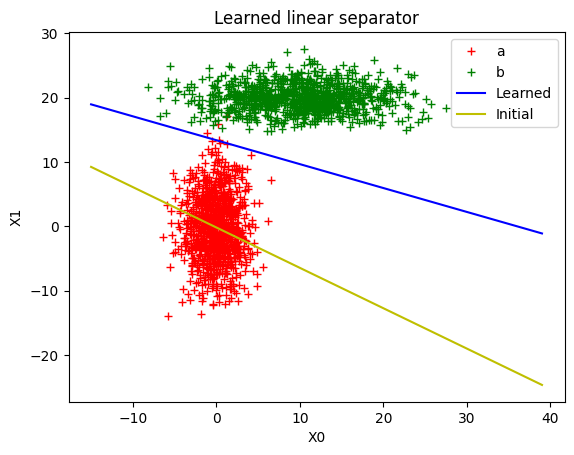

In [237]:
# Draw with x0 from x0_start to x1_stop
x0_start = -15
x0_stop = 40

draw_knowledge(W, x0_start, x0_stop, a, b)

# 7/ Test the trained perceptron on test data. This test data can be drawn with the same Gaussian distributions used to draw the training set.

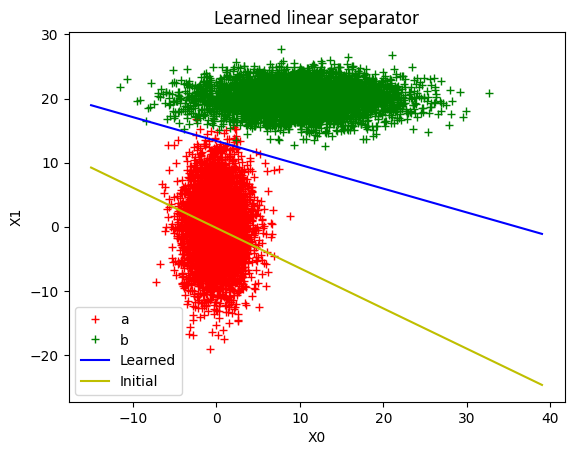

Accuracy on test data: 99.730%


In [251]:
N = 5000

a_test = np.random.normal((0,0), (2,5), (N,2))
b_test = np.random.normal((10,20), (6,2), (N,2))

X_test = pre_process(a_test, b_test)

acc = accuracy(X_test, W)

draw_knowledge(W, x0_start, x0_stop, a_test, b_test)

print(f"Accuracy on test data: {acc*100:.3f}%")